In [11]:
# Dependency imports
import pandas as pd
import matplotlib.pyplot as plt
import os

# Log location
LOG_FOLDER = "logs"

# Simulation Analysis

### Baseline: One Agent - One Task

In [30]:
# Load one_worker_one_task.csv
df = pd.read_csv(os.path.join(LOG_FOLDER, "one_worker_one_task.csv"))
df = df[["RunId", "iteration", "Step", "Completed_Tasks", "Active_Tasks"]]

# Sum of completed tasks over all runs per step
df = df.groupby("Step").agg(
    Completed_Tasks_Sum=("Completed_Tasks", "sum"),
    Completed_Tasks_Mean=("Completed_Tasks", "mean"),
    Completed_Tasks_Std=("Completed_Tasks", "std"),
).reset_index()


<Figure size 1000x600 with 0 Axes>

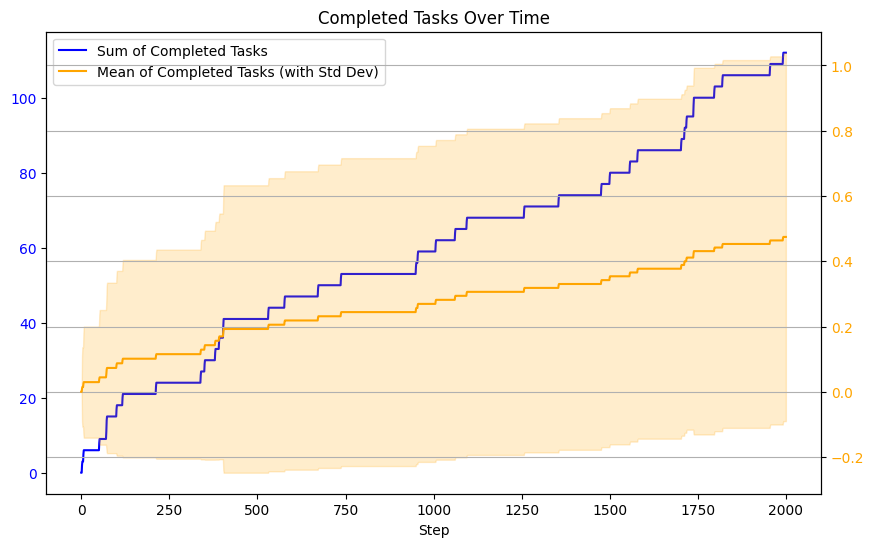

In [31]:
# Plotting
plt.figure(figsize=(10, 6))
# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis for Sum
ax1.plot(df["Step"], df["Completed_Tasks_Sum"], color='blue', label='Sum of Completed Tasks')
ax1.set_xlabel("Step")
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis for Mean
ax2 = ax1.twinx()
ax2.plot(df["Step"], df["Completed_Tasks_Mean"], color='orange', label='Mean of Completed Tasks (with Std Dev)')
ax2.fill_between(df["Step"], 
                 df["Completed_Tasks_Mean"] - df["Completed_Tasks_Std"],
                 df["Completed_Tasks_Mean"] + df["Completed_Tasks_Std"], 
                 color='orange', alpha=0.2)
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.title("Completed Tasks Over Time")
plt.xlabel("Step")
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

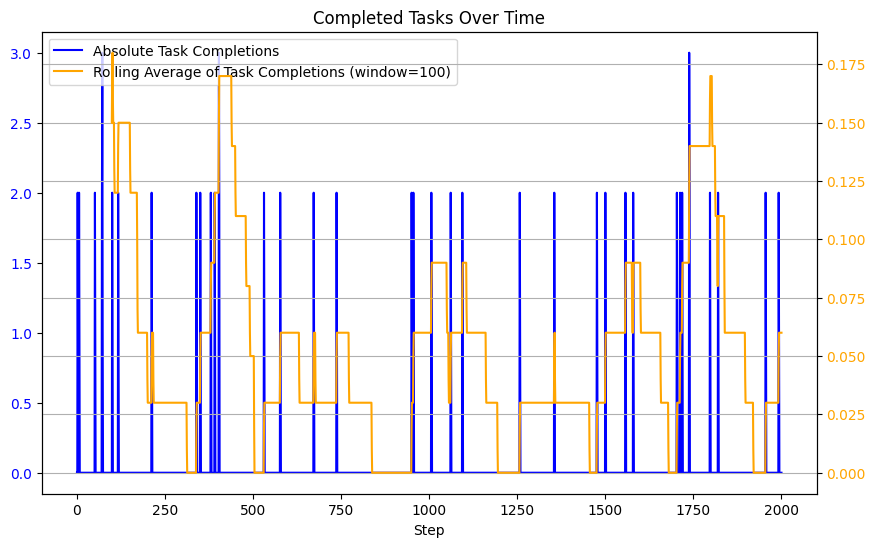

In [39]:
# Plot the average number of completed tasks per step with a rolling average
task_increment = df["Completed_Tasks_Sum"].diff().fillna(0)
rolling_mean_increment = task_increment.rolling(window=100).mean()

plt.figure(figsize=(10, 6))
# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis for absolute values
ax1.plot(df["Step"], task_increment, color='blue', label='Absolute Task Completions')
ax1.set_xlabel("Step")
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis for rolling average
ax2 = ax1.twinx()
ax2.plot(df["Step"], rolling_mean_increment, color='orange', label='Rolling Average of Task Completions (window=100)')
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.title("Completed Tasks Over Time")
plt.xlabel("Step")
plt.grid()
plt.show()

### Comparison: Several Agents - One Task

In [ ]:
# Load several_worker_one_task.csv
df = pd.read_csv(os.path.join(LOG_FOLDER, "several_worker_one_task.csv"))
df = df[["RunId", "iteration", "Step", "num_workers", "Completed_Tasks"]]


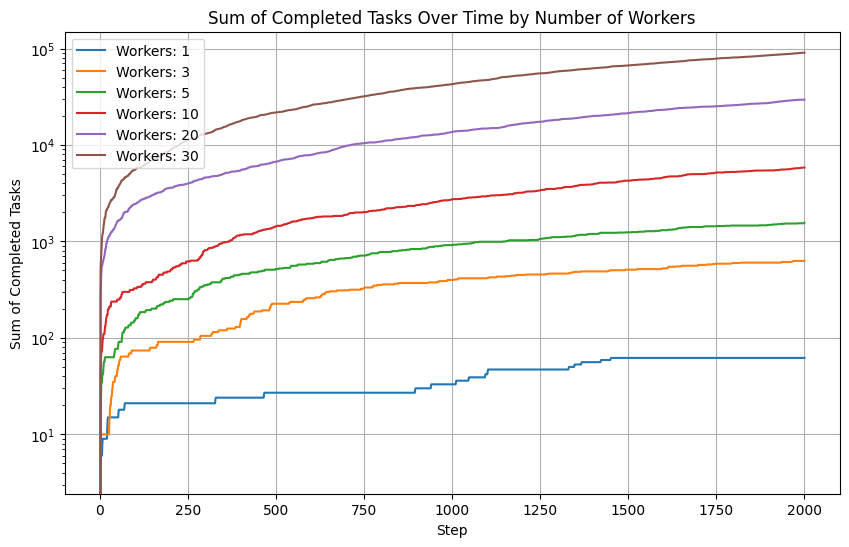

In [43]:
plt.figure(figsize=(10, 6))
for r in df['num_workers'].unique():
    df_worker = df[df['num_workers'] == r]
    subset = df_worker.groupby("Step").agg(
        Completed_Tasks_Sum=("Completed_Tasks", "sum"),
        Completed_Tasks_Mean=("Completed_Tasks", "mean"),
        Completed_Tasks_Std=("Completed_Tasks", "std"),
    ).reset_index()
    plt.plot(subset["Step"], subset["Completed_Tasks_Sum"], label=f'Workers: {r}')

plt.title("Sum of Completed Tasks Over Time by Number of Workers")
plt.xlabel("Step")
plt.ylabel("Sum of Completed Tasks")
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

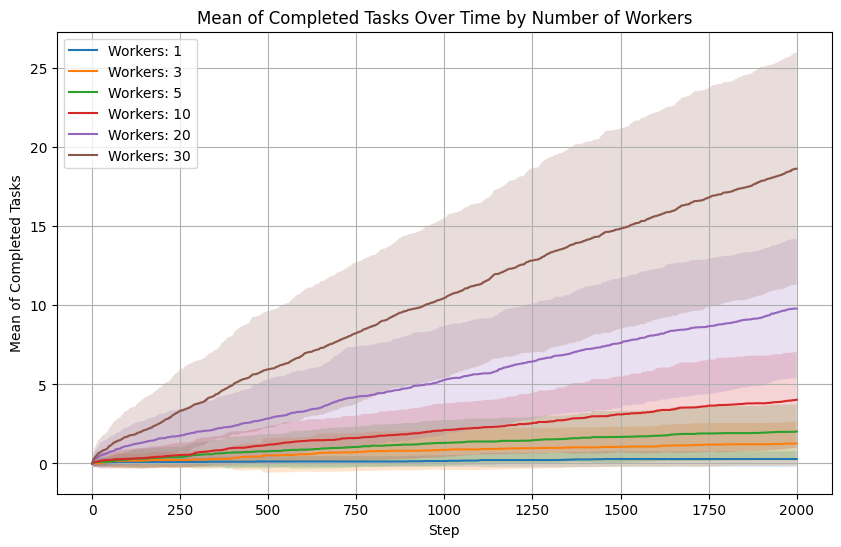

In [ ]:
plt.figure(figsize=(10, 6))
for r in df['num_workers'].unique():
    df_worker = df[df['num_workers'] == r]
    subset = df_worker.groupby("Step").agg(
        Completed_Tasks_Sum=("Completed_Tasks", "sum"),
        Completed_Tasks_Mean=("Completed_Tasks", "mean"),
        Completed_Tasks_Std=("Completed_Tasks", "std"),
    ).reset_index()
    plt.plot(subset["Step"], subset["Completed_Tasks_Mean"], label=f'Workers: {r}')
    plt.fill_between(subset["Step"], subset["Completed_Tasks_Mean"] - subset["Completed_Tasks_Std"],
                     subset["Completed_Tasks_Mean"] + subset["Completed_Tasks_Std"], alpha=0.2)

plt.title("Mean of Completed Tasks Over Time by Number of Workers")
plt.xlabel("Step")
plt.ylabel("Mean of Completed Tasks")
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

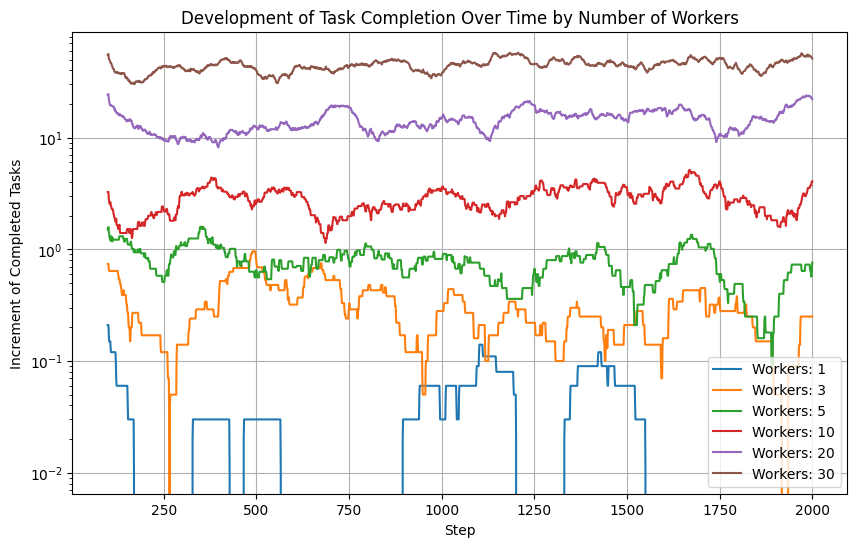

In [48]:
plt.figure(figsize=(10, 6))
for r in df['num_workers'].unique():
    df_worker = df[df['num_workers'] == r]
    subset = df_worker.groupby("Step").agg(
        Completed_Tasks_Sum=("Completed_Tasks", "sum"),
    ).reset_index()
    task_increment = subset["Completed_Tasks_Sum"].diff().fillna(0)
    rolling_mean_increment = task_increment.rolling(window=100).mean()

    plt.plot(subset["Step"], rolling_mean_increment, label=f'Workers: {r}')

plt.title("Development of Task Completion Over Time by Number of Workers")
plt.xlabel("Step")
plt.ylabel("Increment of Completed Tasks")
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

### Comparison: Several Agents - One Task (longer task execution)